# Linear regression

Import all the necessary modules and load the fram dataset 'fram.txt' into a pandas dataframe. 

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot
import statsmodels.stats.api as sms



In [2]:

def get_path(filename):
    import sys
    import os
    prog_name = sys.argv[0]
    if os.path.basename(prog_name) == "__main__.py":   
        return os.path.join(os.path.dirname(prog_name), "..", "src", filename)
    else:
        return filename
    

fram = pd.read_csv(get_path("fram.txt"), sep="\t")
fram.describe()

,ID,AGE,FRW,SBP,SBP10,DBP,CHOL,CIG,CHD,DEATH,YRS_DTH
count,1394.000000,1394.000000,1394.000000,1394.000000,767.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000
mean,4737.184362,52.431133,105.365136,148.086083,148.040417,90.135581,234.644907,8.029412,1.187948,1.700861,16.219512
std,1073.406896,4.781507,17.752489,28.022062,25.706664,14.226235,46.303822,11.584138,2.615976,3.203132,3.921413
min,1070.000000,45.000000,52.000000,90.000000,94.000000,50.000000,96.000000,0.000000,0.000000,0.000000,1.000000
25%,3890.250000,48.000000,94.000000,130.000000,130.000000,80.000000,200.000000,0.000000,0.000000,0.000000,18.000000
50%,4821.000000,52.000000,103.000000,142.000000,145.000000,90.000000,230.000000,0.000000,0.000000,0.000000,18.000000
75%,5641.750000,56.000000,114.000000,160.000000,160.000000,98.000000,264.000000,20.000000,0.000000,0.000000,18.000000
max,6442.000000,62.000000,222.000000,300.000000,264.000000,160.000000,430.000000,60.000000,10.000000,10.000000,18.000000


Normalize and center the data using the rescale function followed by scaling of each variable and add s to variable names.

In [3]:
def rescale(series):
    return (series - series.mean()) / (2*series.std())    

In [4]:

fram['sAGE'] = rescale(fram.AGE)
fram['sFRW'] = rescale(fram.FRW)
fram['sSBP'] = rescale(fram.SBP)
fram['sDBP'] = rescale(fram.DBP)
fram['sCHOL'] = rescale(fram.CHOL)
fram['sCIG'] = rescale(fram.CIG)

fram

,ID,SEX,AGE,FRW,SBP,SBP10,DBP,CHOL,CIG,CHD,YRS_CHD,DEATH,YRS_DTH,CAUSE,sAGE,sFRW,sSBP,sDBP,sCHOL,sCIG
0,4988,female,57,135,186,NaN,120,150,0,1,pre,7,11,unknown,0.477764,0.834668,0.676501,1.049625,-0.914016,-0.346569
1,3001,female,60,123,165,NaN,100,167,25,0,16,10,17,unknown,0.791473,0.496687,0.301796,0.346698,-0.730446,0.732493
2,5079,female,54,115,140,NaN,90,213,5,0,8,8,13,unknown,0.164056,0.271367,-0.144281,-0.004765,-0.233727,-0.130757
3,5162,female,52,102,170,NaN,104,280,15,0,10,7,11,unknown,-0.045083,-0.094779,0.391012,0.487283,0.489755,0.300868
4,4672,female,45,99,185,NaN,105,326,20,0,8,10,17,unknown,-0.777070,-0.179274,0.658658,0.522430,0.986475,0.516680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,4132,male,51,100,160,NaN,98,216,30,0,10,7,11,stroke,-0.149653,-0.151109,0.212581,0.276405,-0.201332,0.948305
1390,5418,male,50,95,174,NaN,106,192,5,0,8,8,13,stroke,-0.254223,-0.291935,0.462384,0.557576,-0.460490,-0.130757
1391,6260,male,57,88,144,NaN,96,184,20,0,2,3,3,stroke,0.477764,-0.489090,-0.072908,0.206113,-0.546876,0.516680
1392,5786,male,62,87,156,NaN,90,255,0,0,6,5,7,stroke,1.000612,-0.517255,0.141209,-0.004765,0.219799,-0.346569


Form a model that predicts systolic blood pressure using weight, gender, and cholesterol level as explanatory variables. Store the fitted model in variable named `fit`.

In [5]:
model = smf.ols(formula="SBP ~ sFRW + SEX + sCHOL", data=fram)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SBP   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     66.37
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           4.13e-40
Time:                        15:48:15   Log-Likelihood:                -6530.4
No. Observations:                1394   AIC:                         1.307e+04
Df Residuals:                    1390   BIC:                         1.309e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.0199      0.985    152.336      0.000     148.088     151.952
SEX[T.male]    -4.0659      1.451     -2.803      0.005      -6.912      -1.220
sFRW           17.7205      1.426     12.431      0.000      14.924      20.517
sCHOL           4.9169      1.431      3.436      0.001       2.110       7.724
==============================================================================
Omnibus:                      327.612   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              843.676
Skew:                           1.237   Prob(JB):                    6.28e-184
Kurtosis:                       5.899   Cond. No.                         2.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Add the variable AGE to the model and inspect the estimates of the coefficients using the `summary` method of the fitted model. Again use the name `fit` for the fitted model. (From now on assume that we always use the name `fit` for the variable of the fitted model.)

In [6]:

model = smf.ols(formula="SBP ~ sFRW + SEX + sCHOL + sAGE", data=fram)
fit = model.fit()
fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SBP   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     59.39
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           2.44e-46
Time:                        15:48:16   Log-Likelihood:                -6513.6
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1389   BIC:                         1.306e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.1695      0.974    154.221      0.000     148.259     152.080
SEX[T.male]    -4.3805      1.435     -3.053      0.002      -7.195      -1.566
sFRW           16.9771      1.415     11.999      0.000      14.202      19.753
sCHOL           4.2696      1.419      3.009      0.003       1.486       7.053
sAGE            8.1332      1.400      5.810      0.000       5.387      10.879
==============================================================================
Omnibus:                      321.087   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              840.955
Skew:                           1.206   Prob(JB):                    2.45e-183
Kurtosis:                       5.944   Cond. No.                         2.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


The R-squared explains the power of explanatory varaible, so by addding AGE to the model the value of R-squared is increased by 0.146-0.125=0.021

The variable sFRW explains the variance of the target variable the most due to its high coefficient. 

Try to add to the model all the interactions with other variables. 

In [7]:
model = smf.ols(formula="SBP ~ sFRW + SEX + sCHOL + sAGE + sFRW:SEX + sFRW:sCHOL + sFRW:sAGE + SEX:sCHOL + SEX:sAGE + sCHOL:sAGE", data=fram)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SBP   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     24.52
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           4.92e-43
Time:                        15:48:16   Log-Likelihood:                -6509.9
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1383   BIC:                         1.310e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           150.5439      1.001    150.355      0.000     148.580     152.508
SEX[T.male]          -4.7309      1.451     -3.261      0.001      -7.577      -1.885
sFRW                 16.6450      1.723      9.660      0.000      13.265      20.025
sFRW:SEX[T.male]      1.6673      3.088      0.540      0.589      -4.390       7.725
sCHOL                 3.6181      1.878      1.926      0.054      -0.066       7.302
SEX[T.male]:sCHOL     1.0231      2.933      0.349      0.727      -4.730       6.776
sAGE                 10.2189      2.003      5.101      0.000       6.289      14.149
SEX[T.male]:sAGE     -4.2923      2.886     -1.488      0.137      -9.953       1.368
sFRW:sCHOL            4.9729      2.718      1.829      0.068      -0.359      10.305
sFRW:sAGE            -2.0866      2.803     -0.744      0.457      -7.585       3.412
sCHOL:sAGE           -4.7564      3.044     -1.563      0.118     -10.728       1.215
==============================================================================
Omnibus:                      313.112   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              802.290
Skew:                           1.185   Prob(JB):                    6.10e-175
Kurtosis:                       5.863   Cond. No.                         6.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Visualize the model as the function of weight for the youngest (sAGE=-1.0), middle aged (sAGE=0.0), and oldest (sAGE=1.0) women while assuming the background variables to be centered. Visualize both the data points and the fitted lines.

Intercept            150.543854
SEX[T.male]           -4.730869
sFRW                  16.644973
sFRW:SEX[T.male]       1.667323
sCHOL                  3.618124
SEX[T.male]:sCHOL      1.023083
sAGE                  10.218851
SEX[T.male]:sAGE      -4.292337
sFRW:sCHOL             4.972936
sFRW:sAGE             -2.086574
sCHOL:sAGE            -4.756423
dtype: float64


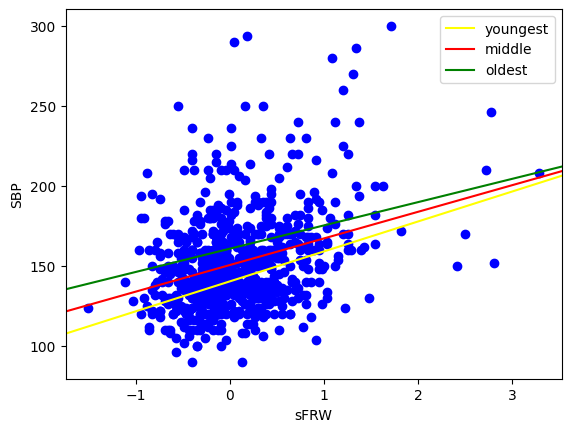

In [8]:
"""visuallize the model age wise"""

p=fit.params
ffram = fram[fram['SEX']=='female']
plt.scatter(ffram['sFRW'],ffram['SBP'],color='blue')
plt.xlabel('sFRW')
plt.ylabel('SBP')
print(p)

#sns.regplot(x='sFRW', y='SBP', color='red', data=ffram, label='Youngest')
abline_plot(intercept=p.Intercept - p['sAGE'], slope=p.sFRW - p['sFRW:sAGE'],ax=plt.gca(), color='yellow', label='youngest')
abline_plot(intercept=p.Intercept, slope=p.sFRW,ax=plt.gca(), color='red', label='middle')
abline_plot(intercept=p.Intercept + p['sAGE'], slope=p.sFRW + p['sFRW:sAGE'],ax=plt.gca(), color='green', label='oldest')

plt.legend()


Judging from the slope of the regression lines as the person gets older their dependence on the weight decreases for systolic blood pressure.

### Even more accurate model

Include the background variable `sCIG` from the data and its interactions. Visualize the model for systolic blood pressure as the function of the most important explanatory variable. Visualize separate lines for the small (-1.0), average (0.0), and large (1.0) values of `sCHOL`. Other variables can be assumed to be at their mean value.

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     16.50
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           2.99e-40
Time:                        15:48:16   Log-Likelihood:                -6508.6
No. Observations:                1394   AIC:                         1.305e+04
Df Residuals:                    1378   BIC:                         1.313e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           151.3182      1.16

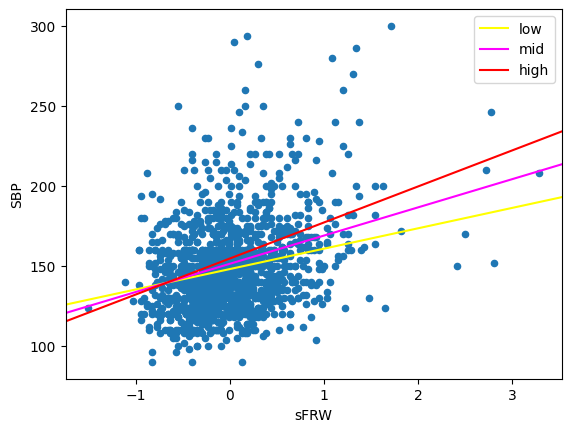

In [9]:
fit=smf.ols('SBP ~ sFRW + SEX + sCHOL + sAGE + sCIG + sFRW:SEX + sFRW:sCHOL + sFRW:sAGE + sFRW:sCIG + SEX:sCHOL + SEX:sAGE +SEX:sCIG + sCHOL:sAGE + sCHOL:sCIG + sAGE:sCIG', data=fram).fit()
print(fit.summary())
p=fit.params
fram.plot.scatter('sFRW', 'SBP')

abline_plot(intercept=p.Intercept - p['sCHOL'], slope=p.sFRW - p['sFRW:sCHOL'],ax=plt.gca(), color='yellow', label='low')
abline_plot(intercept=p.Intercept, slope=p.sFRW,ax=plt.gca(), color='magenta', label='mid')
abline_plot(intercept=p.Intercept + p['sCHOL'], slope=p.sFRW + p['sFRW:sCHOL'],ax=plt.gca(), color='red', label='high')

plt.legend()




The model accuracy remains almost same as previous one where sCIG was not one of the explanatory variable. Only a difference of 0.001 is obeserved in the r square value.



# Logistic regression

In [10]:
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

We will continue predicting high blood pressure by taking in some continuous background variables, such as the age.

Recreate the model `HIGH_BP ~ sFRW + SEX + SEX:sFRW` presented in the introduction. Make sure, that you get the same results. Use name `fit` for the fitted model. Compute and store the error rate into variable `error_rate_orig`.

In [11]:
fram['HIGH_BP'] = (fram['SBP'] >= 140) | (fram['DBP'] >= 90)
fram['HIGH_BP'] = fram['HIGH_BP'].astype(int)

fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + SEX:sFRW", data=fram, family=sm.families.Binomial()).fit()
print(fit.summary())

error_rate_orig = np.mean(((fit.fittedvalues < 0.5) & fram.HIGH_BP) | ((fit.fittedvalues > 0.5) & ~fram.HIGH_BP))
print(error_rate_orig)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                HIGH_BP   No. Observations:                 1394
Model:                            GLM   Df Residuals:                     1390
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -856.87
Date:                Tue, 21 Mar 2023   Deviance:                       1713.7
Time:                        15:48:17   Pearson chi2:                 1.39e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.06351
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7631      0.082  

Add the `sAGE` variable and its interactions. Check the prediction accuracy of the model and compare it to the previous model. Store the prediction accuracy to variable `error_rate`.

In [12]:
fit = smf.glm(formula='HIGH_BP ~ sFRW + SEX + sAGE + sFRW:SEX + sFRW:sAGE + SEX:sAGE', data=fram,family=sm.families.Binomial()).fit()
print(fit.summary())

error_rate = np.mean(((fit.fittedvalues < 0.5) & fram.HIGH_BP) | ((fit.fittedvalues > 0.5) & ~fram.HIGH_BP))
error_rate

                 Generalized Linear Model Regression Results                  
Dep. Variable:                HIGH_BP   No. Observations:                 1394
Model:                            GLM   Df Residuals:                     1387
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -845.51
Date:                Tue, 21 Mar 2023   Deviance:                       1691.0
Time:                        15:48:17   Pearson chi2:                 1.39e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.07865
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.8079      0.084  

0.3278335724533716

Visualize the predicted probability of high blood pressure as the function of weight. Draw two figures with altogether six curves: young, middle aged, and old women; and young, middle aged, and old men. Use `plt.subplots`. (Plotting works in similar fashion as in the introduction. The argument factors need, however, be changed as in the example about visualisation of continuous variable.) 

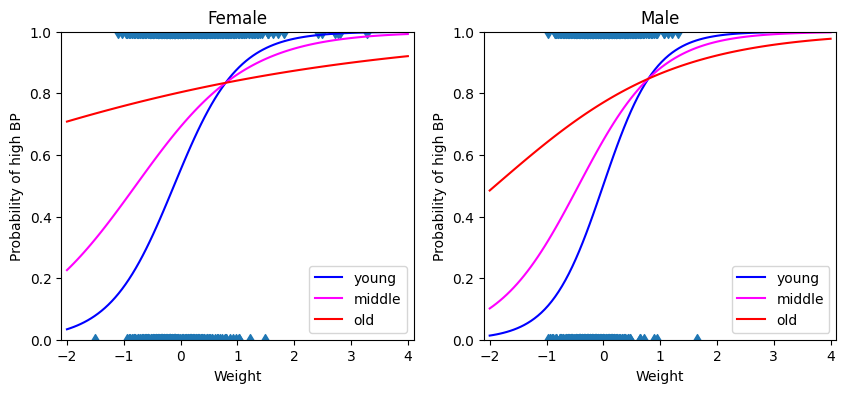

In [13]:
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

p=fit.params
X=np.linspace(-2,4,100)
fig, ax = plt.subplots(1,2, subplot_kw={'xlim': (-2.1, 4.1), 'ylim': (0,1),'xlabel': 'Weight', 'ylabel': 'Probability of high BP'},figsize=(10, 4))

ax[0].scatter(fram.sFRW[(fram.SEX=='female')], fram.HIGH_BP[(fram.SEX=='female')], marker='d')
ax[0].plot(X, logistic(X*(p.sFRW-p['sFRW:sAGE'])-p['sAGE']+p.Intercept), color='blue', label='young')
ax[0].plot(X, logistic(X*p.sFRW+p.Intercept), color='magenta', label='middle')
ax[0].plot(X, logistic(X*(p.sFRW+p['sFRW:sAGE'])+p['sAGE']+p.Intercept), color='red', label='old')
ax[0].set_title('Female')
ax[0].legend(loc='lower right')

ax[1].scatter(fram.sFRW[(fram.SEX=='male')], fram.HIGH_BP[(fram.SEX=='male')], marker='d')
ax[1].plot(X, logistic(X*(p.sFRW+p['sFRW:SEX[T.male]']-p['sFRW:sAGE'])+p['SEX[T.male]']-p['sAGE']+p.Intercept), color='blue', label='young')
ax[1].plot(X, logistic(X*(p.sFRW+p['sFRW:SEX[T.male]'])+p['SEX[T.male]']+p.Intercept), color='magenta', label='middle')
ax[1].plot(X, logistic(X*(p.sFRW+p['sFRW:SEX[T.male]']+p['sFRW:sAGE'])+p['SEX[T.male]']+p['sAGE']+p.Intercept), color='red', label='old')
ax[1].set_title('Male')
ax[1].legend(loc='lower right')


# Put your solution here!

Old females tend to have lesser dependency of high bp on weight as compared to old males as we can see from the slopes in the above graphs.

Create here a helper function `train_test_split` that gets a Dataframe as parameter and return a pair of Dataframes: one for training and the second for testing. 
The function should get parameters in the following way:
```python
train_test_split(fram, train_fraction=0.8)
```
The data should be split randomly to training and testing Dataframes so that `train_fraction` fraction of data should go into the training set. Use the `sample` method of the Dataframe.

In [14]:
def train_test_split(fram, train_fraction=0.8):
    fram_train = fram.sample(frac=train_fraction, random_state=1)
    fram_test = fram.drop(fram_train.index)
    return fram_train, fram_test

Check the prediction accuracy of your model using cross validation. Use 100-fold cross validation and training_fraction 0.8.

In [15]:

np.random.seed(1)


error_model=[]
np.random.seed(1)

for i in range(100):
    train, test = train_test_split(fram)
    fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + SEX:sFRW + sAGE + sFRW:sAGE + SEX:sAGE", data=train, family=sm.families.Binomial()).fit()
    pred = fit.predict(test, transform=True)
    tp = (pred > 0.5) & (test["HIGH_BP"] == 1)
    tn = (pred < 0.5) & (test["HIGH_BP"] == 0)
    correct_pred = tp | tn
    incorrect_pred = ~correct_pred
    error_rate = np.mean(incorrect_pred)
    error_model.append(error_rate)  

err_rate = np.mean(error_model)
acc = 1 - err_rate
print(f"Accuracy = {acc}, Error rate = {err_rate}")

Accuracy = 0.6487455197132616, Error rate = 0.35125448028673845


## Predicting coronary heart disease

Let us use again the same data to learn a model for the occurrence of coronary heart disease. We will use logistic regression to predict whether a patient *sometimes* shows symptoms of coronary heart disease. For this, add to the data a binary variable `hasCHD`, that describes the event (`CHD > 0`). The binary variable `hadCHD` can get only two values: 0 or 1. As a sanity check, compute the mean of this variable, which tells the number of positive cases.

In [16]:
fram['hasCHD'] = (fram.CHD > 0).astype(int)
fram['hasCHD'].mean()


0.22022955523672882

Next, form a logistic regression model for variable `hasCHD` by using variables sCHOL, sCIG, and sFRW, and their interactions as explanatory variables. Store the fitted model to variable `fit`. Compute the prediction accuracy of the model, store it to variable `error_rate`.

In [17]:

fit = smf.glm(formula='hasCHD ~ sFRW + sCHOL + sCIG + sFRW:sCHOL + sFRW:sCIG + sCHOL:sCIG', data=fram,family=sm.families.Binomial()).fit()
print(fit.summary())
#prediction accuracy
pred = fit.predict(fram, transform=True)
error_rate = np.mean(((pred < 0.5) & (fram.hasCHD==1)) | ((pred > 0.5) & (fram.hasCHD==0)))
error_rate

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 hasCHD   No. Observations:                 1394
Model:                            GLM   Df Residuals:                     1387
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -721.19
Date:                Tue, 21 Mar 2023   Deviance:                       1442.4
Time:                        15:48:20   Pearson chi2:                 1.39e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01950
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2888      0.067    -19.101      0.0

0.22022955523672882

Visualize the model by using the most important explanator on the x axis. Visualize both the points (with `plt.scatter`)
and the logistic curve (with `plt.plot`).

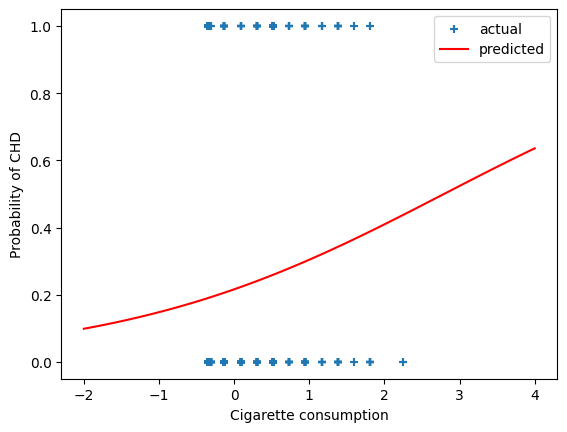

In [18]:

def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

p=fit.params
X=np.linspace(-2,4,100)
plt.scatter(fram.sCIG, fram.hasCHD, marker='+', label='actual')

plt.plot(X, logistic(X*(p.sCIG)+p.Intercept), color='red', label='predicted')
plt.xlabel('Cigarette consumption')
plt.ylabel('Probability of CHD')
plt.legend()



The accuracy of the model is around 78% which better than the 0.5 probability of the 0 or 1 case. So the model can be used for some practical purposes.

If a person has cholestherol 200, smokes 17 cigarets per day, and has weight 100, then what is the probability that he/she sometimes shows signs of coronal hear disease? Note that the model expects normalized values. Store the normalized values to dictionary called `point`. Store the probability in variable `predicted`.

In [19]:
point = {}
point['sFRW'] = (100 - fram.FRW.mean()) / (fram.FRW.std()*2)
point['sCIG'] = (17 - fram.CIG.mean()) / (fram.CIG.std()*2)
point['sCHOL'] = (200 - fram.CHOL.mean()) / (fram.CHOL.std()*2)

predicted  = fit.predict(point)[0]
print(f"The probability of person getting the disease is {predicted}")


The probability of person getting the disease is 0.21616166025040992
